# Multiple Linear Regression

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.precision = 2
sns.set_theme(font_scale=1.1, style="whitegrid")

## Loading the dataset

In [2]:
dataset = pd.read_csv('data/1000_Companies.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


## Describing the dataset

In [4]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.00,1000.00,1000.00,1000.00
mean,81668.93,122963.90,226205.06,119546.16
std,46537.57,12613.93,91578.39,42888.63
min,0.00,51283.14,0.00,14681.40
25%,43084.50,116640.68,150969.58,85943.20
50%,79936.00,122421.61,224517.89,117641.47
75%,124565.50,129139.12,308189.81,155577.11
max,165349.20,321652.14,471784.10,476485.43


## Matrix of features and labels

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (1000, 4)
y (1000,)


## Visualizing the dataset

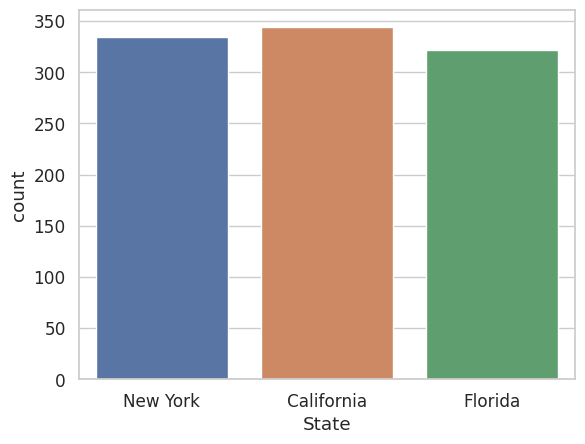

In [6]:
sns.countplot(data=dataset, x="State");

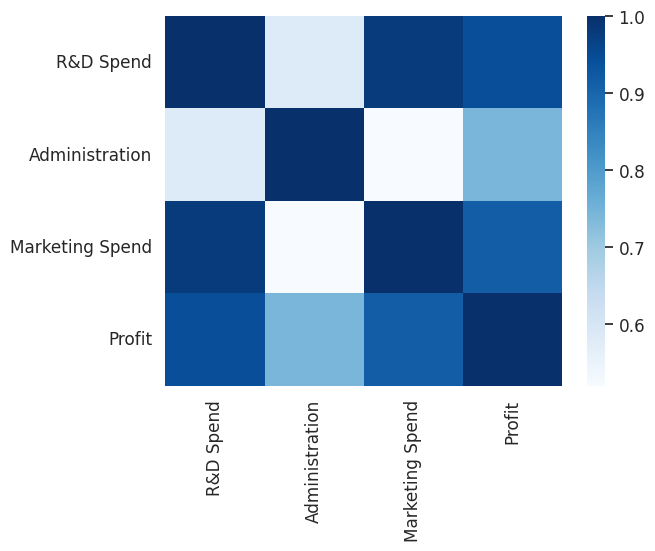

In [7]:
sns.heatmap(dataset.corr(numeric_only=True), cmap="Blues");

## Encoding categorical data

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#
# transformers: list of tuples
# List of (name, transformer, columns) tuples 
# specifying the transformer objects to be applied to subsets of the data.
# For avoiding dummy variable trap, drop the first column.
ct = ColumnTransformer(
    transformers=[("encoded_state", OneHotEncoder(drop="first"), [3])],
    remainder="passthrough",
)
X = ct.fit_transform(X)
print(X[:5, :])

## Alternative
# enc = OneHotEncoder(drop="first", sparse_output=False)
# encoded = enc.fit_transform(X[:, [3]])
# X = np.hstack((encoded, X[:, :-1]))

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]]


## Splitting the dataset into the training set and test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"X_train {X_train.shape}")
print(f"X_test  {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test  {y_test.shape}")

X_train (800, 5)
X_test  (200, 5)
y_train (800,)
y_test  (200,)


## Training the Multiple Linear Regression model

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the test set

In [11]:
y_pred = regressor.predict(X_test)
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,89012.03,89790.62
1,87654.56,88427.07
2,94093.35,94894.68
3,175396.26,175680.87
4,83356.62,83411.73
5,110395.79,110571.90
6,105008.31,132145.23
7,90687.29,91473.38
8,164180.27,164597.05
9,53483.76,53222.83


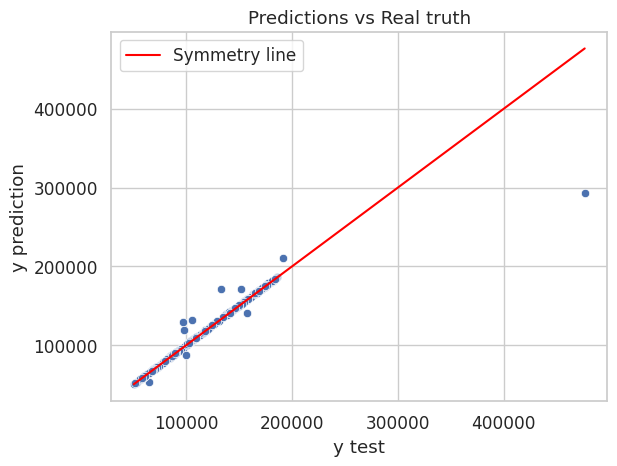

In [16]:
symmetry_line = [y_test.min(), y_test.max()]

sns.scatterplot(x=y_test, y=y_pred)
plt.plot(symmetry_line, symmetry_line, color="red", label="Symmetry line")
plt.xlabel("y test")
plt.ylabel("y prediction")
plt.title("Predictions vs Real truth")
plt.legend()
plt.plot();

## Plotting the residuals

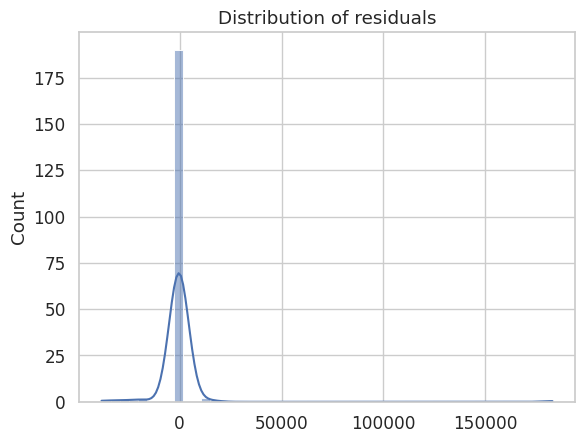

In [13]:
sns.histplot((y_test-y_pred), bins=50, kde=True)
plt.title("Distribution of residuals");

## Observing the coefficients

In [14]:
features = list(dataset.columns[:-2])
features.extend(["dummy1", "dummy2"])
cdf = pd.DataFrame(regressor.coef_, features, columns=["coefficients"])
cdf

,coefficients
R&D Spend,-880.54
Administration,-698.17
Marketing Spend,0.53
dummy1,0.84
dummy2,0.11


## Evaluating the model

In [15]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"The R2 score of the model: {r2:.3f}")

The R2 score of the model: 0.911
